### IMBD Movie review Classification Project

***

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.

This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.

You can also download the dataset <a href = "https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews">here </a>

***

### Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
import warnings
warnings.filterwarnings("ignore")

### Read IMDB Dataset

In [3]:
df=pd.read_csv('IMDB Dataset.csv')

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Check Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


### View descriptive stats

In [6]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


### Check for imbalanced data

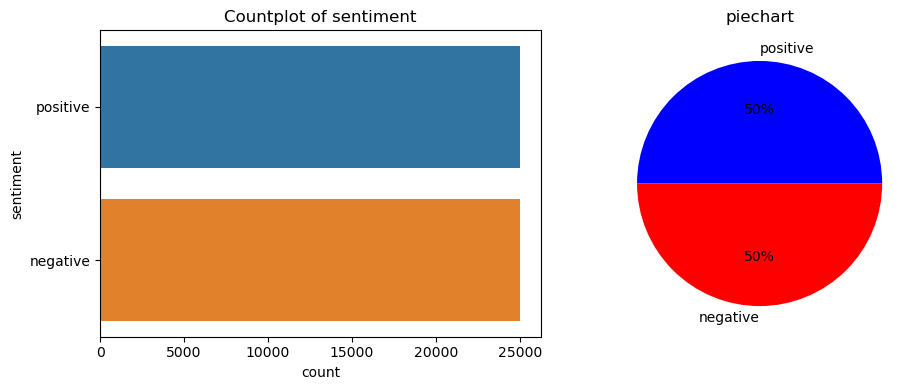

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
#countplot
sns.countplot(y=df['sentiment'],ax=axes[0])
axes[0].set_title('Countplot of sentiment')

#piechart
sentiment_counts=df['sentiment'].value_counts()
labels=sentiment_counts.index
values=sentiment_counts.values
color=['blue','red']
axes[1].pie(values,labels=labels,colors=color,autopct='%.0f%%')
axes[1].set_title('piechart')

plt.tight_layout()
plt.show()

### Create a function to Preprocess the review column

In [8]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [9]:
def preprocess(sentence):
    text = re.sub(r"[^a-zA-Z0-9]"," ",sentence).split()
    words = [x.lower() for x in text]
    word = ' '.join(words)
    return word

### Print some text after applying the function

In [10]:
df['review']=df['review'].apply(preprocess)

In [11]:
for i in range(5):
    print (df['review'][i])
    print()

one of the other reviewers has mentioned that after watching just 1 oz episode you ll be hooked they are right as this is exactly what happened with me br br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word br br it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to many aryans muslims gangstas latinos christians italians irish and more so scuffles death stares dodgy dealings and shady agreements are never far away br br i would say the main appeal of the show is due to the fact that it goes where other shows wouldn t d

### Split the dataset into Input (X) & Target (y) variable

In [12]:
X=df['review']
y=df['sentiment']

In [13]:
y

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 50000, dtype: object

In [14]:
X

0        one of the other reviewers has mentioned that ...
1        a wonderful little production br br the filmin...
2        i thought this was a wonderful way to spend ti...
3        basically there s a family where a little boy ...
4        petter mattei s love in the time of money is a...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    i m going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

### Convert y variable values into 0 and 1 from positive and negative

In [15]:
def values(x):
    if x=='positive':
        return 0
    else:
        if x=='negative':
            return 1

In [16]:
y=y.apply(values)

In [17]:
y

0        0
1        0
2        0
3        1
4        0
        ..
49995    0
49996    1
49997    1
49998    1
49999    1
Name: sentiment, Length: 50000, dtype: int64

### Create Keras tokenizer object with 5000 max words
* Convert text to sequence
* Add padding

In [18]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [19]:
tokenizer=Tokenizer(num_words=5000)

In [20]:
def text_encoding(txt):
    encoded_docs= tokenizer.texts_to_sequences(txt)
    padded_sequence=pad_sequences(encoded_docs,maxlen=300)
    return padded_sequence

### Split the dataset into Training & Testing set

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [23]:
vocab_size=len(tokenizer.word_index)+1

In [24]:
X_train = text_encoding(X_train)
X_test = text_encoding(X_test)

In [25]:
X_train.shape

(40000, 300)

In [26]:
X_train=np.array(X_train,dtype=np.float32)

In [27]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Create keras Sequential Model with LSTM Layers

In [28]:
from tensorflow.keras import Sequential, layers

In [29]:
model = Sequential()

model.add(layers.Embedding(vocab_size, 300)),

model.add(layers.LSTM(300,  return_sequences=True)),

model.add(layers.LSTM(300)),

model.add(layers.Dense(64, activation = 'relu')),
model.add(layers.Dropout(0.2)),

model.add(layers.Dense(1, activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         300       
                                                                 
 lstm (LSTM)                 (None, None, 300)         721200    
                                                                 
 lstm_1 (LSTM)               (None, 300)               721200    
                                                                 
 dense (Dense)               (None, 64)                19264     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,462,029
Trainable params: 1,462,029
Non-

### Compile the model

In [31]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Train the model with our training set

In [32]:
model.fit(X_train, y_train, epochs=5, validation_split = 0.2)

Epoch 1/5
1000/1000 [==============================] - 4370s 4s/step - loss: 0.6934 - accuracy: 0.4998 - val_loss: 0.6932 - val_accuracy: 0.4969
Epoch 2/5
1000/1000 [==============================] - 3875s 4s/step - loss: 0.6932 - accuracy: 0.5023 - val_loss: 0.6932 - val_accuracy: 0.4969
Epoch 3/5
1000/1000 [==============================] - 7867s 8s/step - loss: 0.6931 - accuracy: 0.5025 - val_loss: 0.6931 - val_accuracy: 0.5031
Epoch 4/5
1000/1000 [==============================] - 1902s 2s/step - loss: 0.6932 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.4969
Epoch 5/5
1000/1000 [==============================] - 2735s 3s/step - loss: 0.6932 - accuracy: 0.5027 - val_loss: 0.6931 - val_accuracy: 0.5031


### Make prediction with X_test

In [33]:
y_pred = model.predict(X_test)

313/313 [==============================] - 273s 869ms/step


### Convert to 0 and 1 with higher probability towards 1

In [34]:
y_pred=[1 if i > 0.5 else 0 for i in y_pred]

In [35]:
y_pred

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


### Evaluate the model

In [36]:
model.evaluate(X_train,y_train)

1250/1250 [==============================] - 1471s 1s/step - loss: 0.6932 - accuracy: 0.4981


[0.693153440952301, 0.4981499910354614]

### Check accuracy score

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [38]:
accuracy_score(y_test, y_pred)

0.5074

### Check confusion matrix

<Axes: >

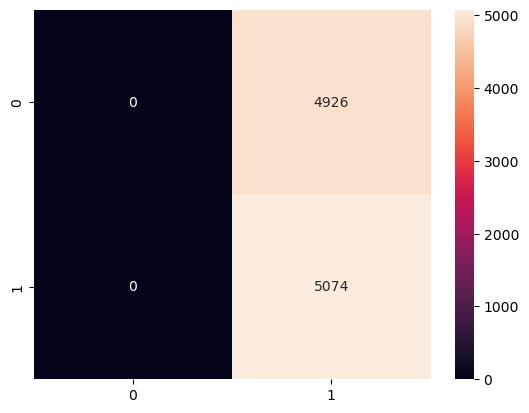

In [39]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')

### Print Classification report

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4926
           1       0.51      1.00      0.67      5074

    accuracy                           0.51     10000
   macro avg       0.25      0.50      0.34     10000
weighted avg       0.26      0.51      0.34     10000



***